In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
config = {
    "base_dir":        "/eos/home-b/bpinolin/ML_output/",
    "plot_config":     "VBSOS",
    "cut":             "sr",
    "samples_version": "0917/v0",
    "cols": [
             'detajj',
             'ptll',
             'detall',        
             'jetpt1', 
             'jetpt2', 
             'met',
             'dphill',
             'dphijj',
             'Mll',
             'btag_central',
             'dR_jl1',
             'dR_jl2',
             'Zeppll',
             'mjj',
             'Zepp1',
             'Zepp2',
             'eta1',
             'eta2',
             'qgl_forward',
             'qgl_central'
            ],
}

In [20]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training/background_balanced.pkl")

In [21]:
import pickle
signal = pickle.load(open(file_sig_bal, "rb"))
bkg = pickle.load(open(file_bkg_bal, "rb"))

In [22]:
len(bkg)

102047

## Comparing train and test

In [18]:
signal_new = signal
bkg_new = bkg

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


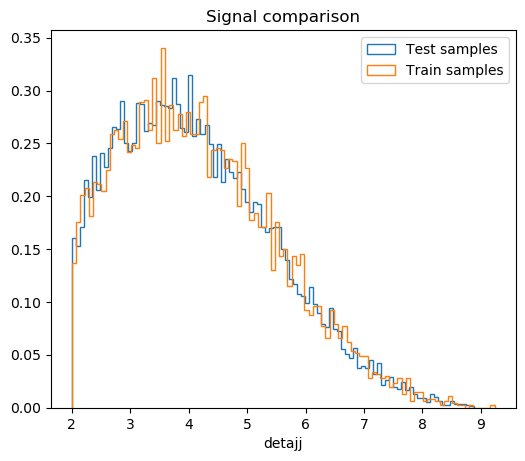

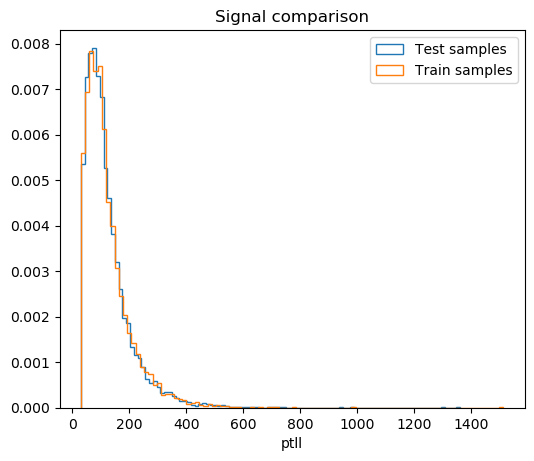

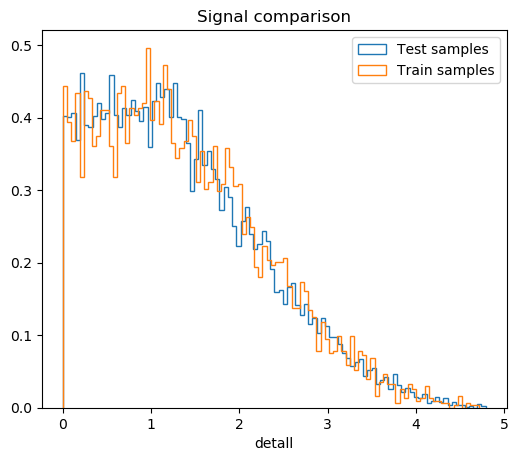

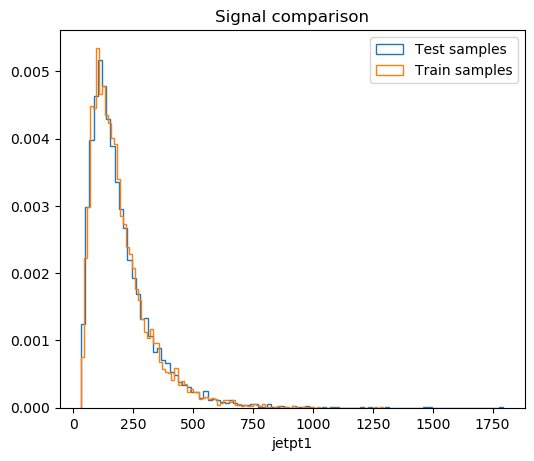

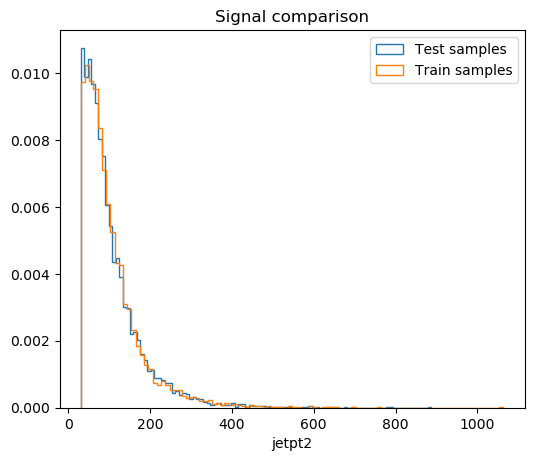

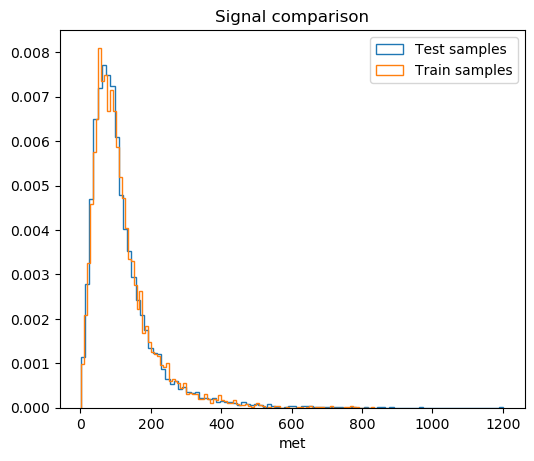

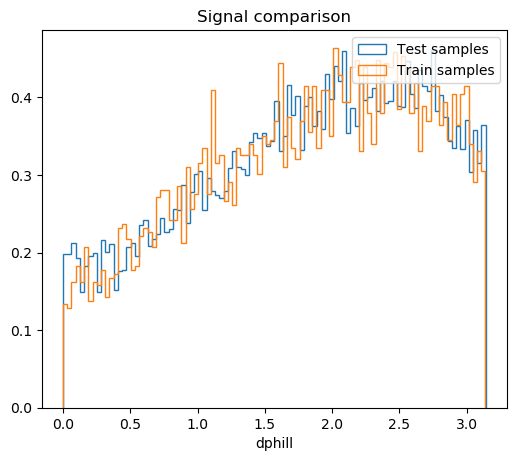

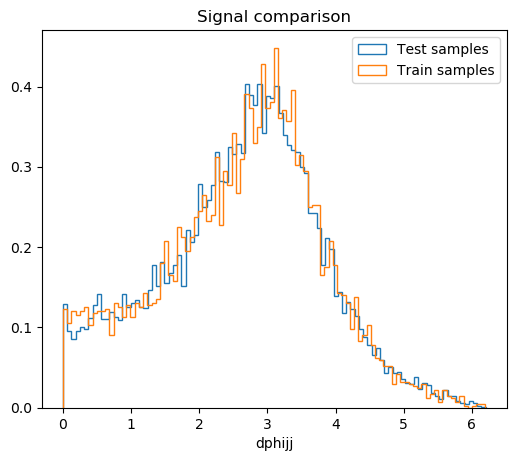

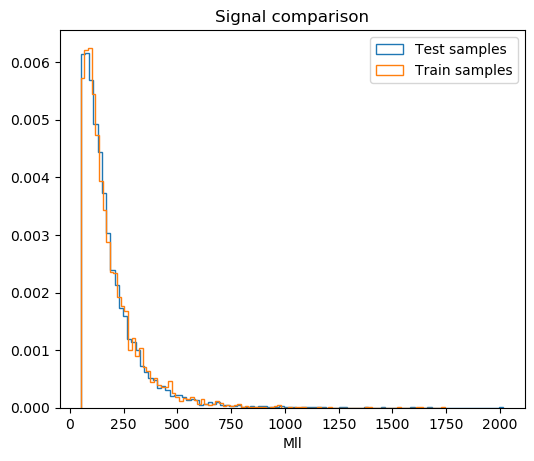

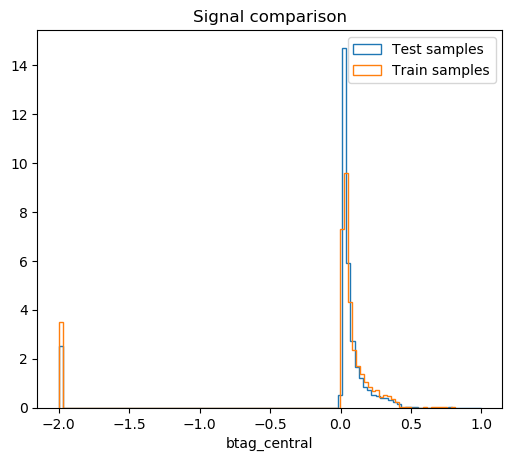

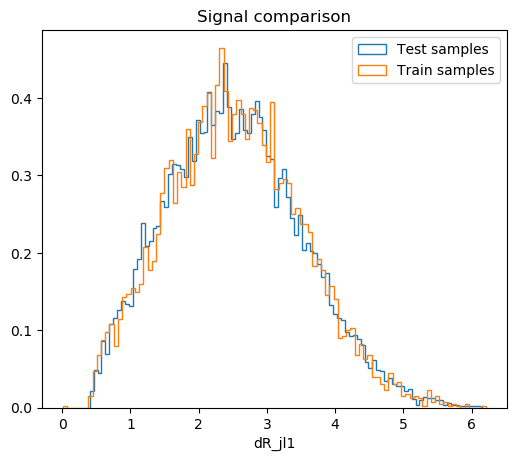

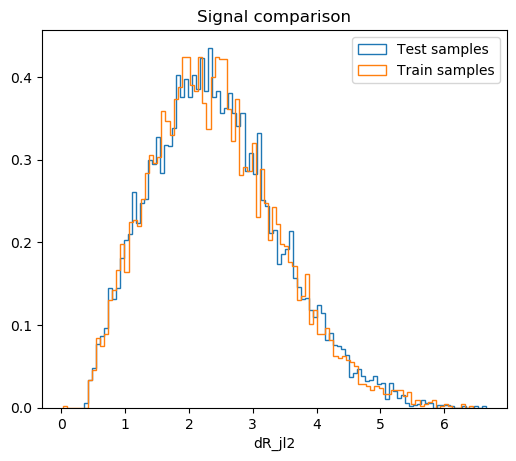

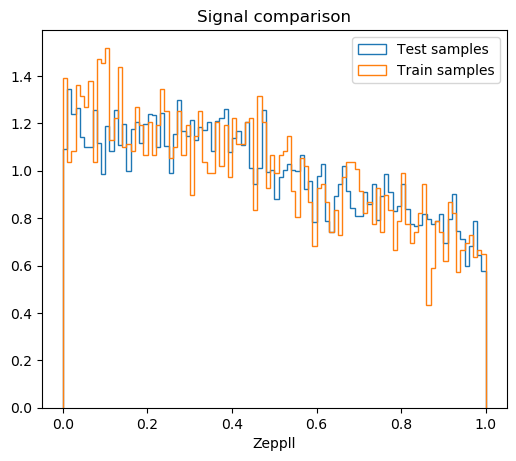

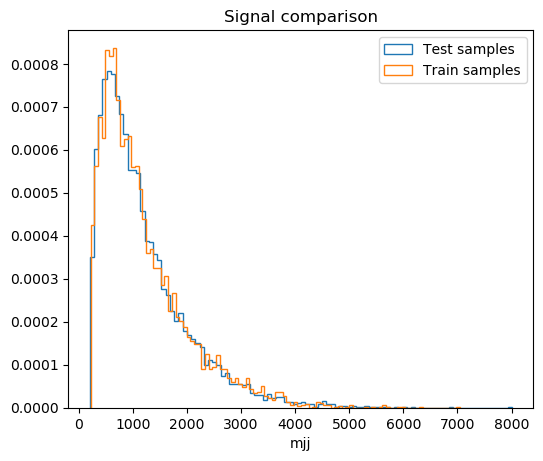

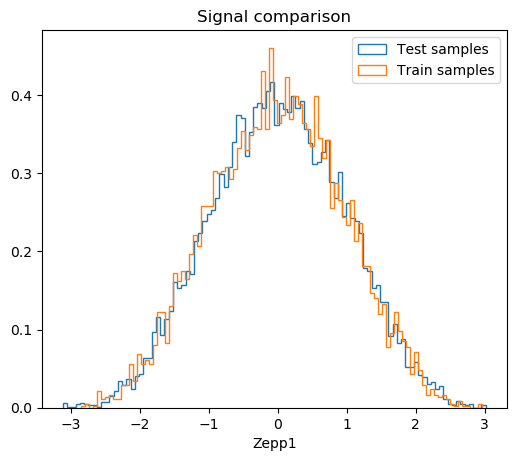

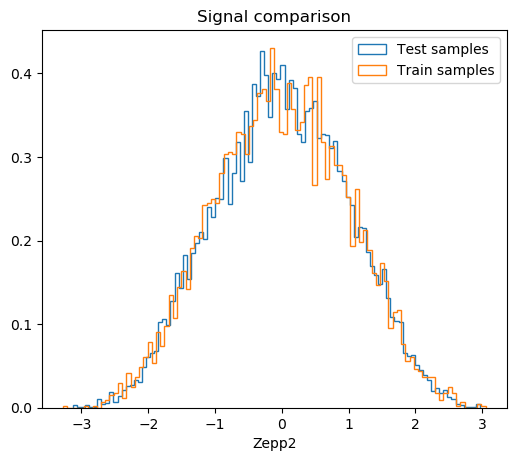

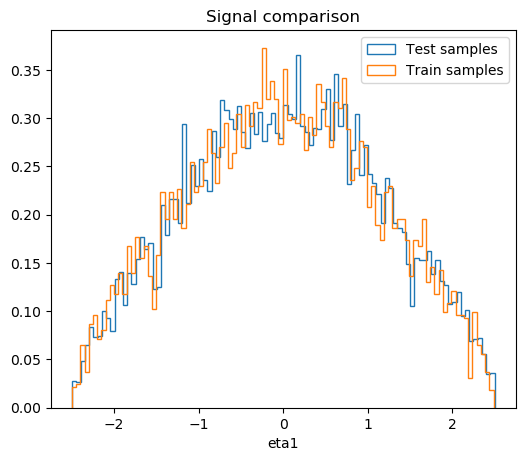

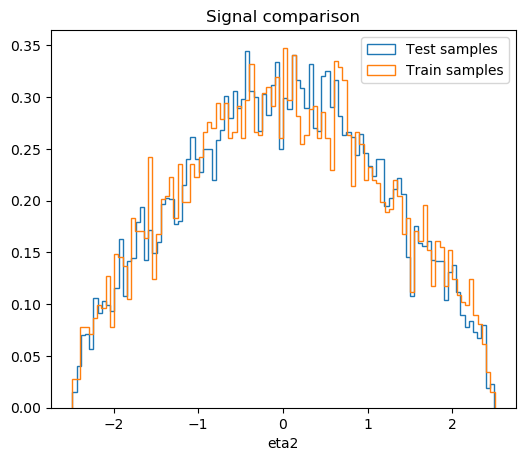

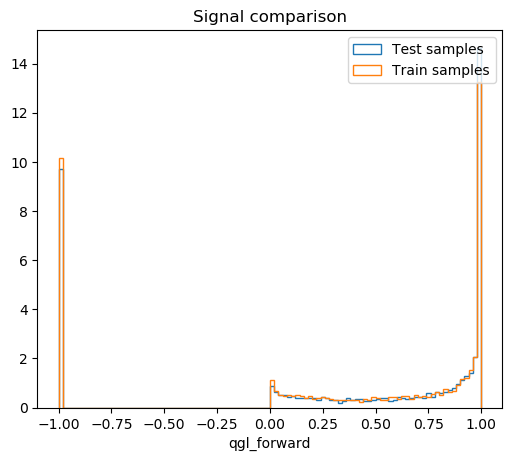

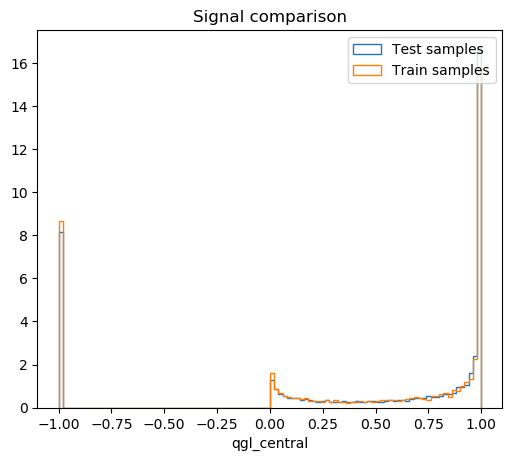

In [23]:
for col in config["cols"]:
    fig = plt.figure(figsize=(6,5), dpi=100)
    n_S, S, _ = plt.hist(signal[col], bins=100, histtype="step", density=True, label="Test samples")
    n_T, T, _ = plt.hist(signal_new[col], bins=100, histtype="step", density=True, label="Train samples")
    plt.legend()
    plt.xlabel(col)
    plt.title("Signal comparison")
    #plt.savefig("/eos/home-b/bpinolin/SWAN_projects/ML_classification/plots/Train-Test-comp/Signal_"+col+".png")
    #plt.show()

## Plotting weights

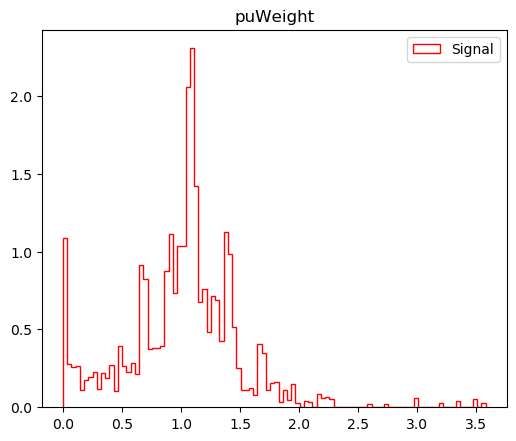

In [6]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["puWeight"], bins=100, histtype="step", density=True, label="Signal", color='red')
#_ = plt.hist(bkg["puWeight"], bins=100, histtype="step", density=True, label="top", color='blue')
plt.legend()
plt.title("puWeight")
plt.show()

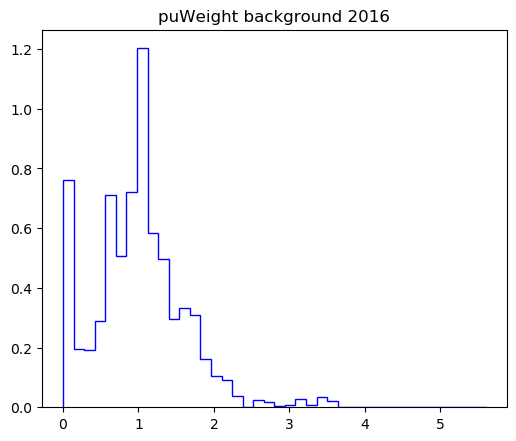

In [7]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["puWeight"], bins=40, histtype="step", density=True, label="top", color='blue')
#plt.legend()
plt.title("puWeight background 2016")
plt.show()

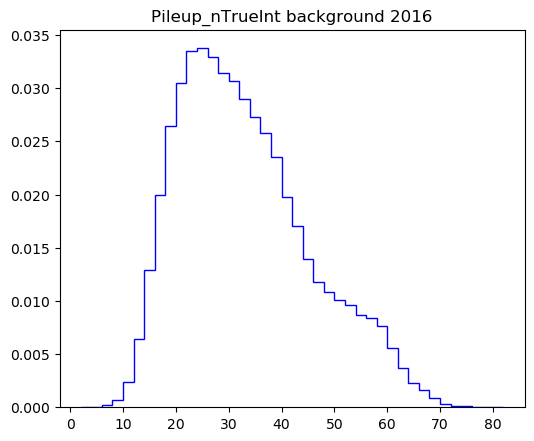

In [8]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["Pileup_nTrueInt"], bins=40, histtype="step", density=True, label="top", color='blue')
#plt.legend()
plt.title("Pileup_nTrueInt background 2016")
plt.show()

In [9]:
a = bkg["puWeight"]
b = bkg["Pileup_nTrueInt"]

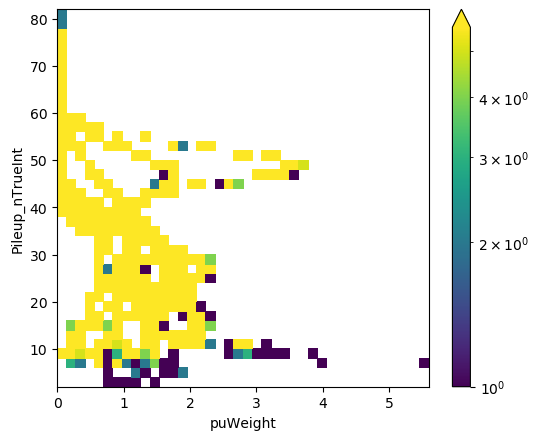

In [10]:
import matplotlib

fig = plt.figure(figsize=(6,5), dpi=100)

plt.hist2d(a,b, bins=40, norm=matplotlib.colors.LogNorm(vmin=1,vmax=a.max()))

plt.colorbar(extend='max')
plt.xlabel("puWeight")
plt.ylabel("Pileup_nTrueInt")
plt.show()

<Figure size 600x500 with 0 Axes>

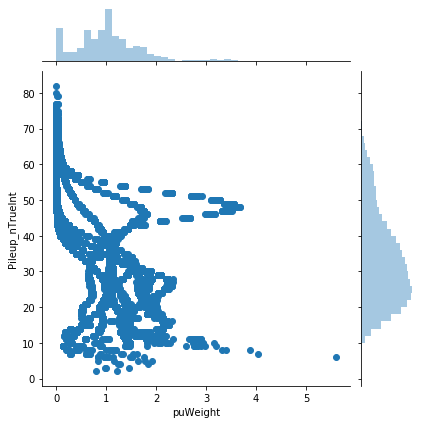

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; #sns.set(color_codes=True)
#sns.set_context("notebook")
#sns.set_style("darkgrid")

fig = plt.figure(figsize=(6,5), dpi=100)

sns.jointplot(x=a, y=b, marginal_kws=dict(bins=40))

## Check weights Wnn

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
X_sig = signal[config["cols"]].values
X_bkg = bkg[config["cols"]].values
Y_sig = np.ones(len(X_sig))
Y_bkg = np.zeros(len(X_bkg))
W_sig = (signal["weight_norm"]).values
W_bkg = (bkg["weight_norm"]).values
Wnn_sig = (signal["weight_"]).values
Wnn_bkg = (bkg["weight_"]).values

X = np.vstack([X_sig, X_bkg])
Y = np.hstack([Y_sig, Y_bkg])
W = np.hstack([W_sig, W_bkg])
Wnn = np.hstack([Wnn_sig, Wnn_bkg])

In [14]:
X_sig_new = signal_new[config["cols"]].values
X_bkg_new = bkg_new[config["cols"]].values
Y_sig_new = np.ones(len(X_sig_new))
Y_bkg_new = np.zeros(len(X_bkg_new))

X_new = np.vstack([X_sig_new, X_bkg_new])
Y_new = np.hstack([Y_sig_new, Y_bkg_new])

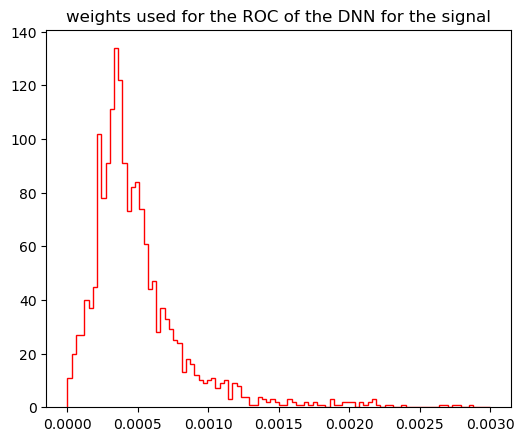

In [37]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(Wnn_sig, bins=100, histtype="step", color='red', range=(0,0.003))
plt.title("weights used for the ROC of the DNN for the signal")
plt.show()

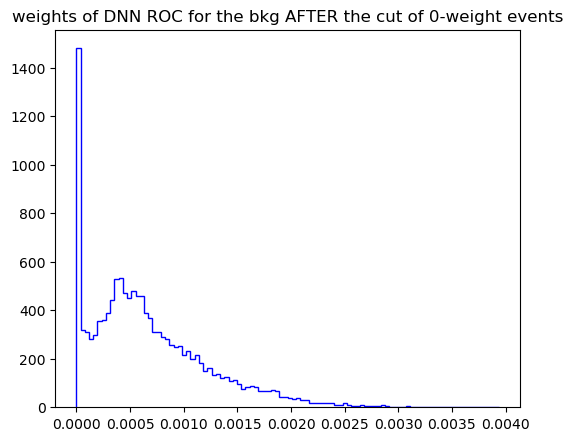

In [38]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(Wnn_bkg, bins=100, histtype="step", color='blue')
plt.title("weights of DNN ROC for the bkg AFTER the cut of 0-weight events")
#plt.yscale("log")
plt.show()

In [24]:
len(bkg)

11698

## Plotting all variables

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
top = scaler.transform(bkg[bkg.sample_name=="top"][config["cols"]].values)

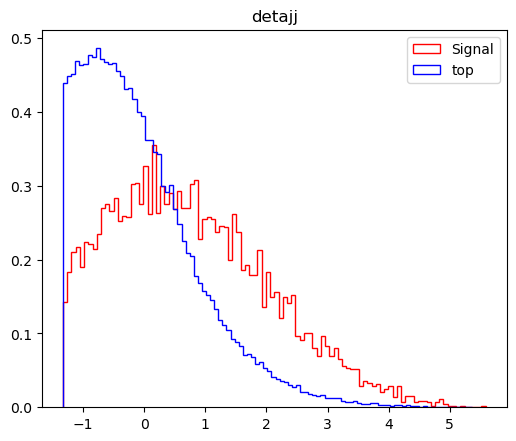

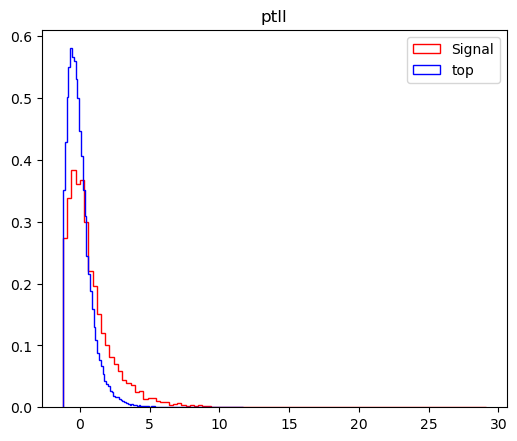

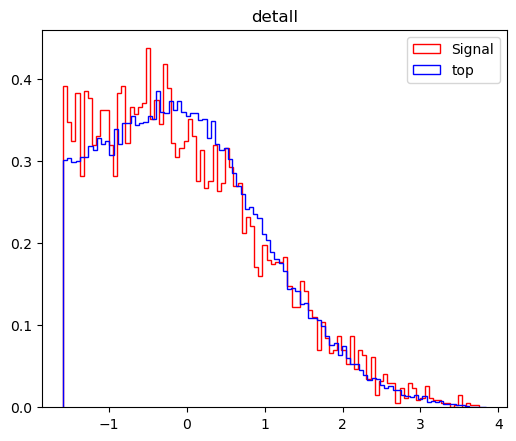

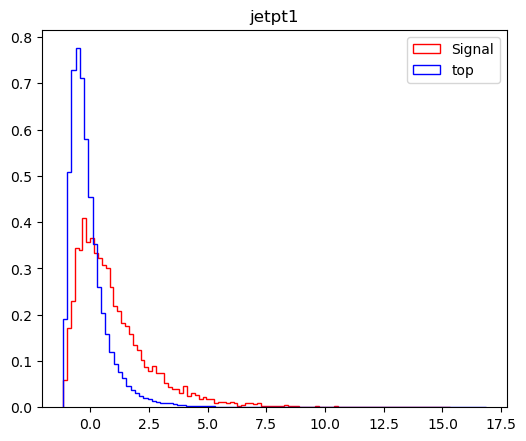

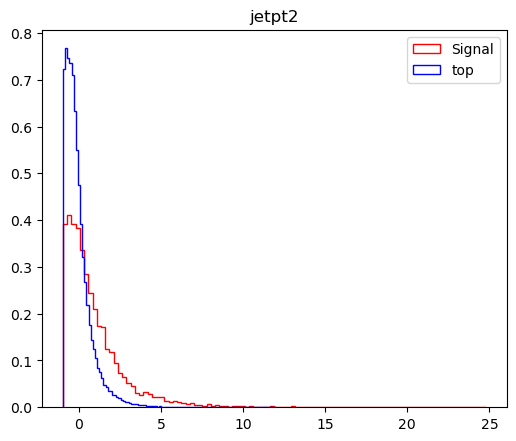

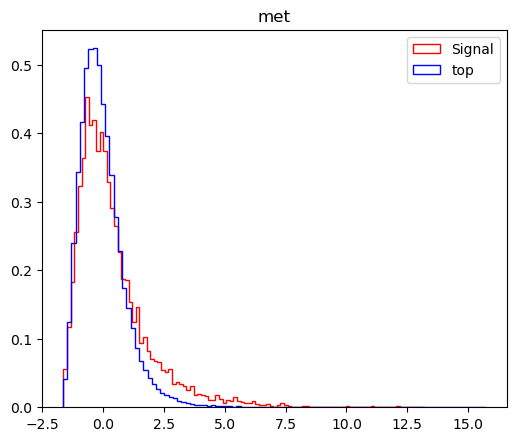

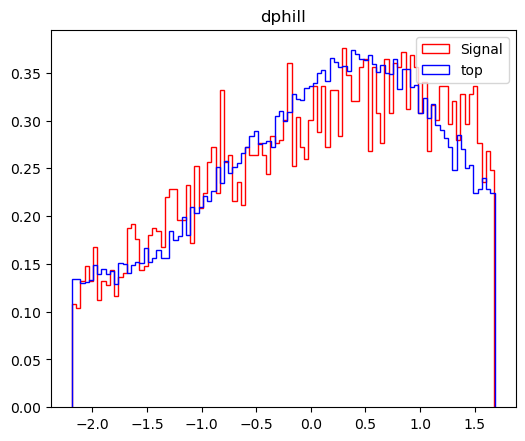

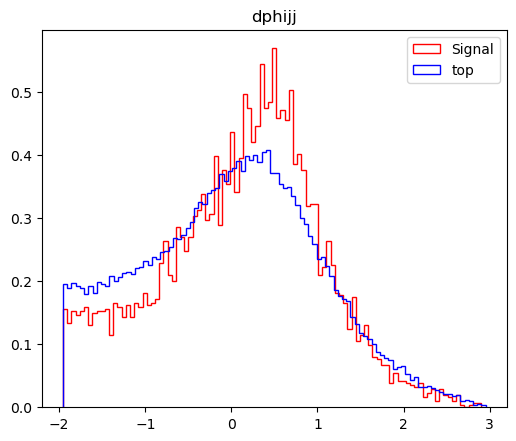

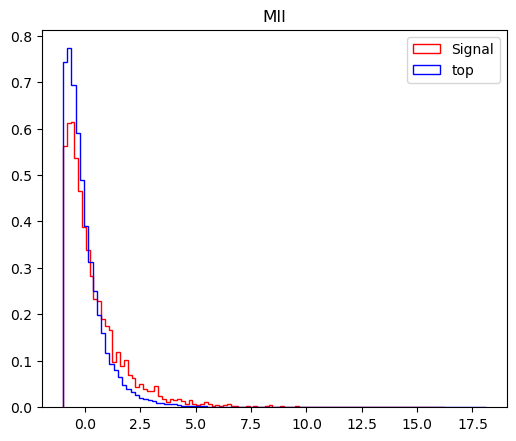

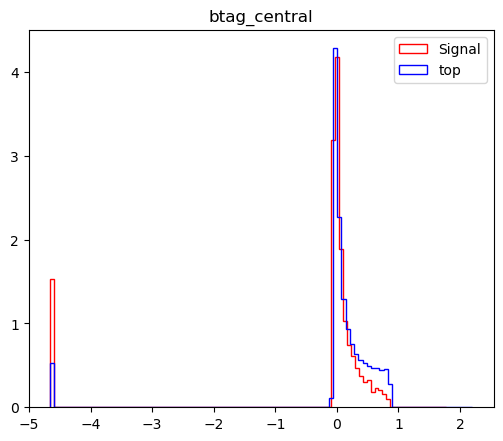

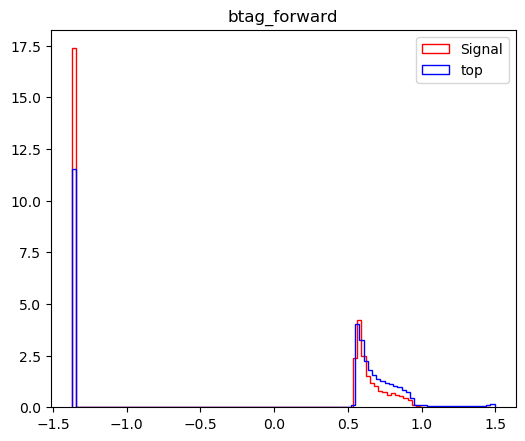

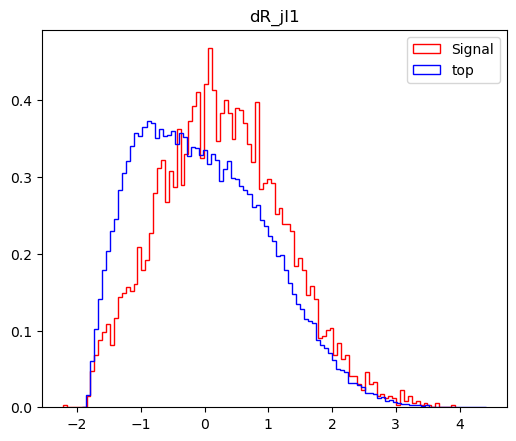

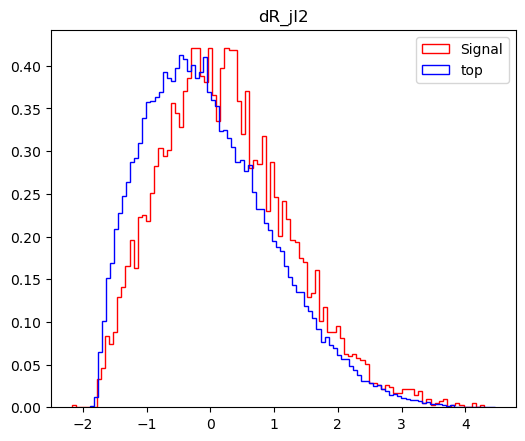

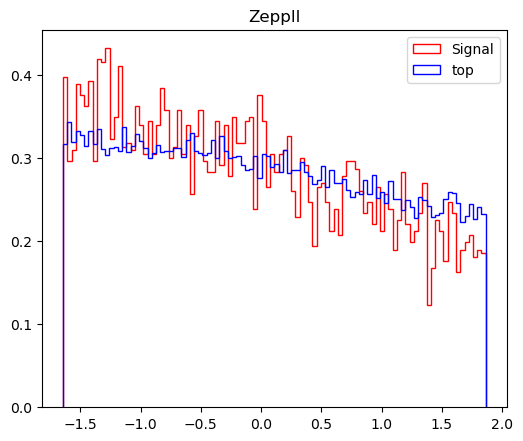

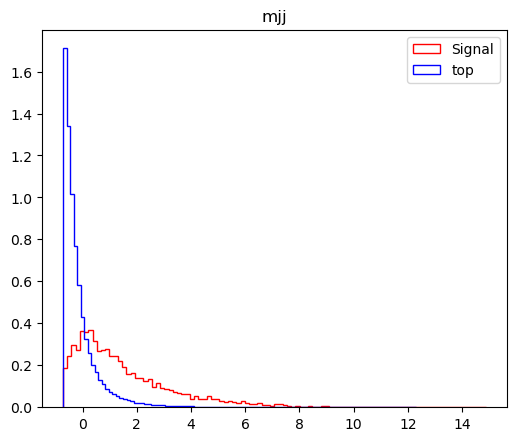

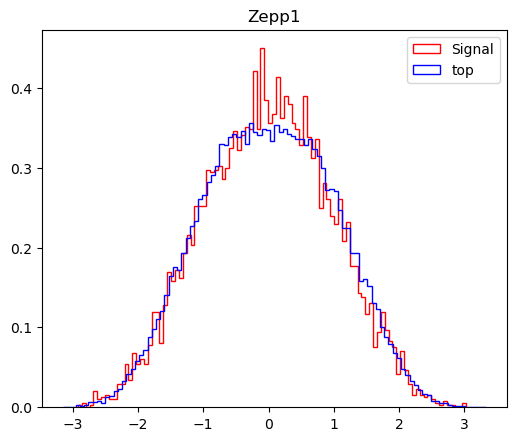

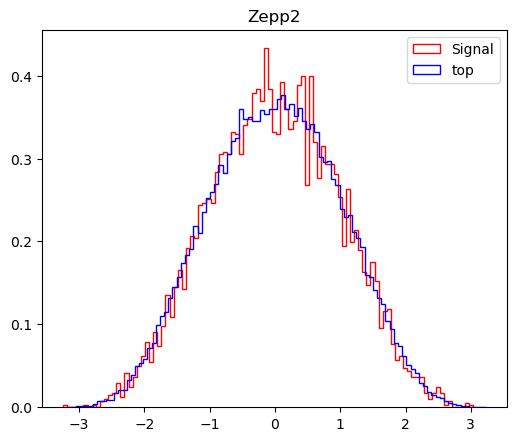

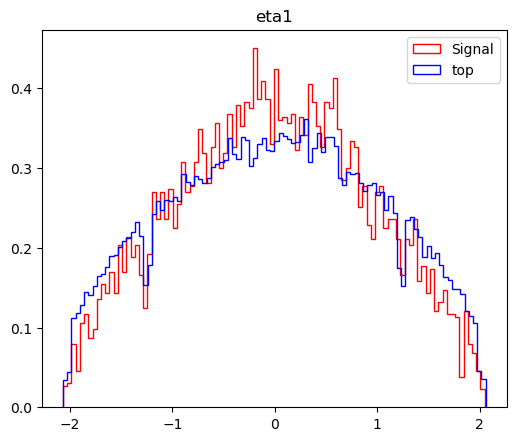

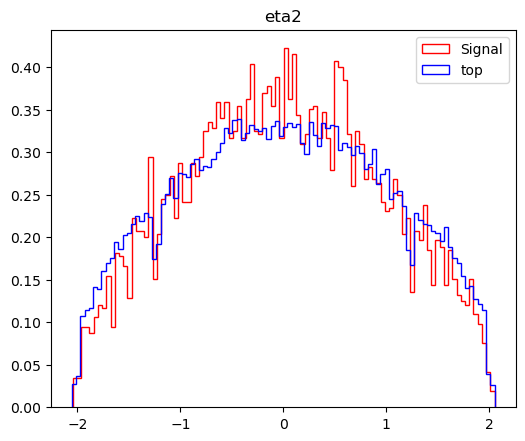

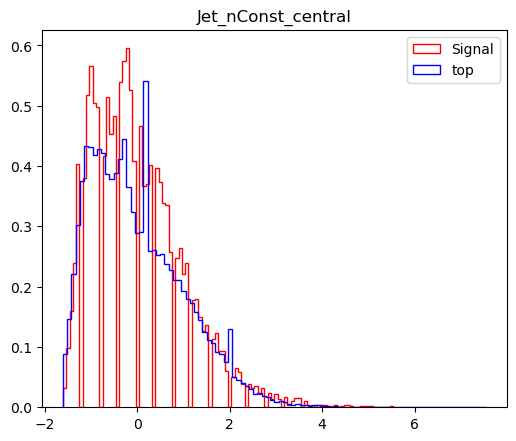

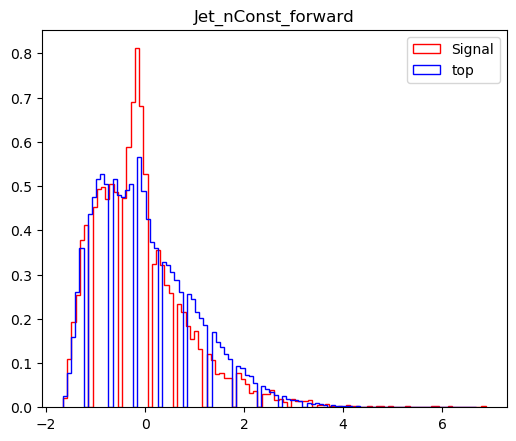

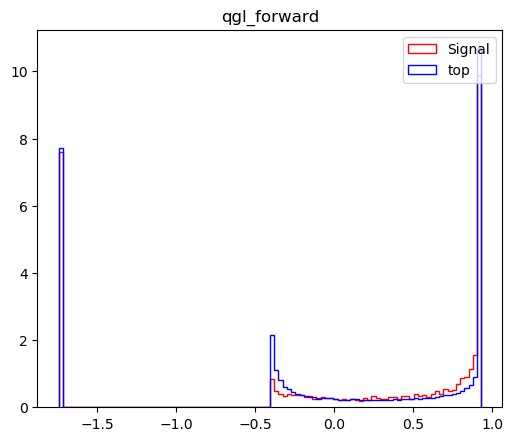

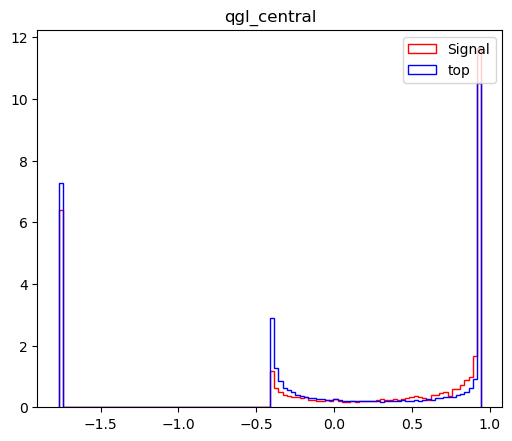

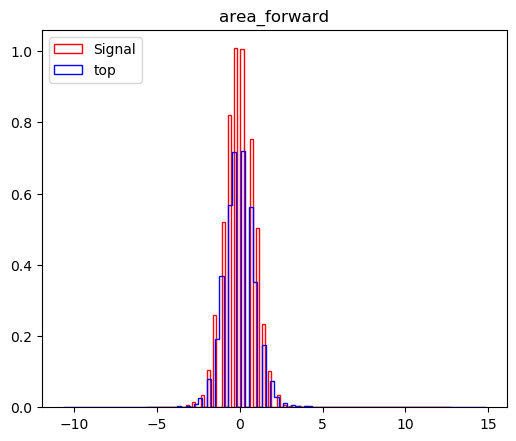

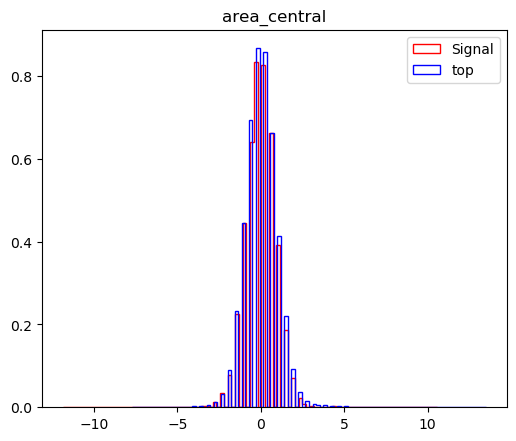

In [18]:
for idx,col in enumerate(config["cols"]):
    fig = plt.figure(figsize=(6,5), dpi=100)
    _ = plt.hist(X_scaled[Y==1,idx], bins=100, histtype="step", density=True, label="Signal", color='red')
    _ = plt.hist(top[:,idx], bins=100, histtype="step", density=True, label="top", color='blue')
    plt.legend()
    plt.title(col)
    plt.show()

## Extracting mjj for ROC

In [8]:
signal = signal[(signal['mjj'] >= 500) & (signal["detajj"] >= 3.5)]
bkg = bkg[(bkg['mjj'] >= 500) & (bkg["detajj"] >= 3.5)]

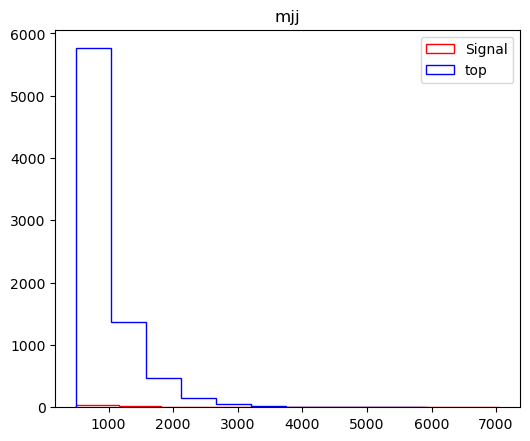

In [9]:
fig = plt.figure(figsize=(6,5), dpi=100)
n_sig, b, _ = plt.hist(signal["mjj"], bins=10, histtype="step", weights=signal["weight_"], label="Signal", color='red')
n_bkg, b, _ = plt.hist(bkg["mjj"], bins=10, histtype="step", weights=bkg["weight_"], label="top", color='blue')
plt.legend()
plt.title("mjj")
plt.show()

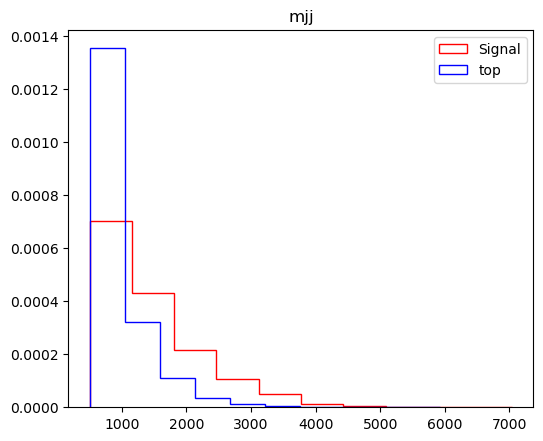

In [10]:
fig = plt.figure(figsize=(6,5), dpi=100)
n_sig, b, _ = plt.hist(signal["mjj"], bins=10, histtype="step", weights=signal["weight_"], label="Signal", color='red', density =True)
n_bkg, b, _ = plt.hist(bkg["mjj"], bins=10, histtype="step", weights=bkg["weight_"], label="top", color='blue', density=True)
plt.legend()
plt.title("mjj")
plt.show()

In [11]:
print(n_sig.tolist())

[0.0007035352640127264, 0.0004297582398844506, 0.00021651920330653795, 0.00010579621833074811, 5.0910215820109e-05, 1.1979501330811193e-05, 5.308350649371747e-06, 2.1983749100040457e-06, 1.5821170026973767e-06, 8.555095048755778e-08]


In [12]:
print(n_bkg.tolist())

[0.0013571233889007547, 0.0003222733295722958, 0.00011148772968620928, 3.498375142289498e-05, 1.3799809008555442e-05, 3.857834406330612e-06, 1.105752831771862e-06, 6.686936786507038e-08, 4.0438133278897777e-07, 7.908329481757447e-08]
